In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
valores = [3,3.333667,3.6673340000000003,4.0010010000000005,4.334668000000001,4.668335000000001,5.002002000000001,5.335669000000001]

8-element Array{Float64,1}:
 3.0    
 3.33367
 3.66733
 4.001  
 4.33467
 4.66834
 5.002  
 5.33567

In [3]:
hs = [0,1e-3,2*1e-3,3*1e-3,4*1e-3,5*1e-3,6*1e-3,7*1e-3]

8-element Array{Float64,1}:
 0.0  
 0.001
 0.002
 0.003
 0.004
 0.005
 0.006
 0.007

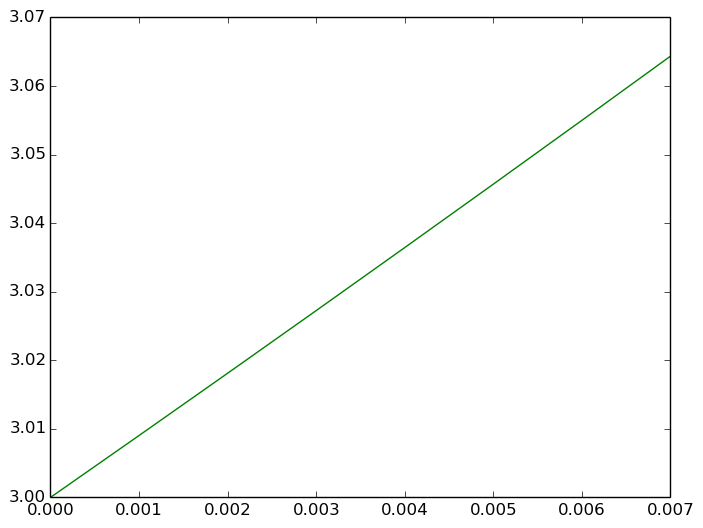

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fccfeccf490>

In [14]:
y = [3/(1-3*k) for k in hs]
plot(hs,y,"g")

In [15]:
function RK2_paso(f, x, t, dt)
    k = x + f(x, t) * dt/2 #Se calcula el punto medio
    return x + f(k, t+ dt/2) * dt
end

function RK4_paso(f, x, t, dt)
    k_1 = f(x, t)
    k_2 = f(x + k_1 * dt/2, t + dt/2)
    k_3 = f(x + k_2 * dt/2, t + dt/2)
    k_4 = f(x + k_3 * dt, t + dt)
    return x + dt * (k_1 +2 * (k_2 + k_3) + k_4 ) / 6
end
function RK4_paso(f, x, t, dt, β) #PFunción con arámetro auxiliar
    k_1 = f(x, t, β)
    k_2 = f(x + k_1 * dt/2, t + dt/2, β)
    k_3 = f(x + k_2 * dt/2, t + dt/2, β)
    k_4 = f(x + k_3 * dt, t + dt, β)
    return x + dt * (k_1 +2 * (k_2 + k_3) + k_4 ) / 6
end


function integrar(f, x_0, t_0, t_f, dt, met) #met=1: Euler, met=2: RK2, met=3 RK3
    x_vec = typeof(x_0)[]
    t_vec = typeof(dt)[]
    push!(x_vec, x_0)
    push!(t_vec, t_0)
    i = 1
    for t in (t_0+dt):dt:t_f
        if met == 1
            x_nuevo = Euler_paso(f, x_vec[i], t, dt)
        elseif met == 2
            x_nuevo = RK2_paso(f, x_vec[i], t, dt)
        elseif met == 3
            x_nuevo = RK4_paso(f, x_vec[i], t, dt)
        else println("Opción no válida. Por favor ingrese 1, 2 o 3.")
        end
        push!(x_vec, x_nuevo)
        push!(t_vec, t)
        i += 1
    end
    return t_vec, x_vec
end

integrar (generic function with 1 method)

In [16]:
function f_pendulo(x, t)
    θ = x[1]
    ω = x[2]
    return [ω, -sin(θ)]
end

f_pendulo (generic function with 1 method)

In [24]:
function f_osc(x,t)
    a = x[1]
    b = x[2]
    return [b, -2a]
end

f_osc (generic function with 1 method)

In [52]:
function f_ton(x,t)
    a = x[1]
    return [a^2]
end

f_ton (generic function with 1 method)

In [45]:
x_0 = [2., 0.]
t_0 = 0.0
t_f = 10
dt= 1e-3
t, x = integrar(f_osc, x_0, t_0, t_f, dt, 3)

([0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009  …  9.991,9.992,9.993,9.994,9.995,9.996,9.997,9.998,9.999,10.0],[[2.0,0.0],[2.0,-0.004],[1.99999,-0.00799999],[1.99998,-0.012],[1.99997,-0.0159999],[1.99995,-0.0199998],[1.99993,-0.0239997],[1.9999,-0.0279995],[1.99987,-0.0319993],[1.99984,-0.035999]  …  [0.0155183,-2.82834],[0.01269,-2.82837],[0.00986158,-2.82839],[0.00703318,-2.82841],[0.00420477,-2.82842],[0.00137634,-2.82843],[-0.00145208,-2.82843],[-0.00428051,-2.82842],[-0.00710892,-2.82841],[-0.00993732,-2.82839]])

In [46]:
a = [x[1] for x in x]
b = [x[2] for x in x]

10001-element Array{Any,1}:
  0.0       
 -0.004     
 -0.00799999
 -0.012     
 -0.0159999 
 -0.0199998 
 -0.0239997 
 -0.0279995 
 -0.0319993 
 -0.035999  
 -0.0399987 
 -0.0439982 
 -0.0479977 
  ⋮         
 -2.82827   
 -2.82831   
 -2.82834   
 -2.82837   
 -2.82839   
 -2.82841   
 -2.82842   
 -2.82843   
 -2.82843   
 -2.82842   
 -2.82841   
 -2.82839   

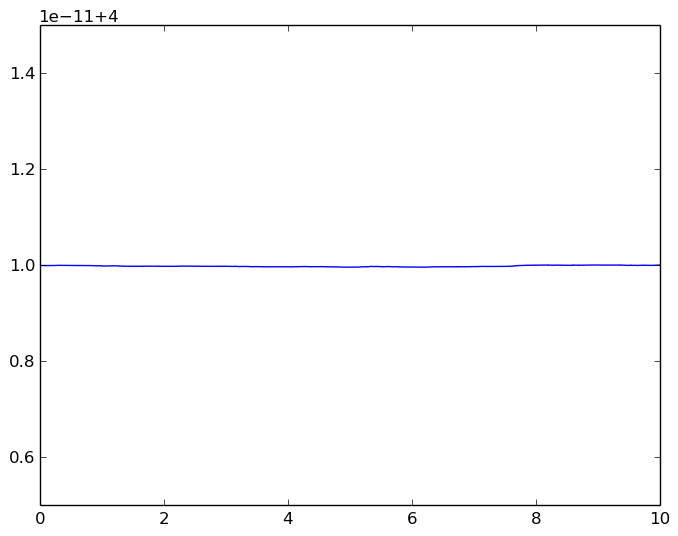

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fccfdd8b290>

In [51]:
plot(t,b.^2/2+a.^2)

In [52]:
function f_ton(x,t)
    a = x[1]
    return [a^2]
end

f_ton (generic function with 1 method)

In [62]:
x_0 = [3.]
t_0 = 0.0
t_f = .33
dt= 1e-3
t, x = integrar(f_ton, x_0, t_0, t_f, dt, 3)

([0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009  …  0.321,0.322,0.323,0.324,0.325,0.326,0.327,0.328,0.329,0.33],[[3.0],[3.00903],[3.01811],[3.02725],[3.03644],[3.04569],[3.05499],[3.06435],[3.07377],[3.08325]  …  [81.081],[88.2352],[96.7741],[107.143],[120.0],[136.363],[157.893],[187.497],[230.761],[299.97]])

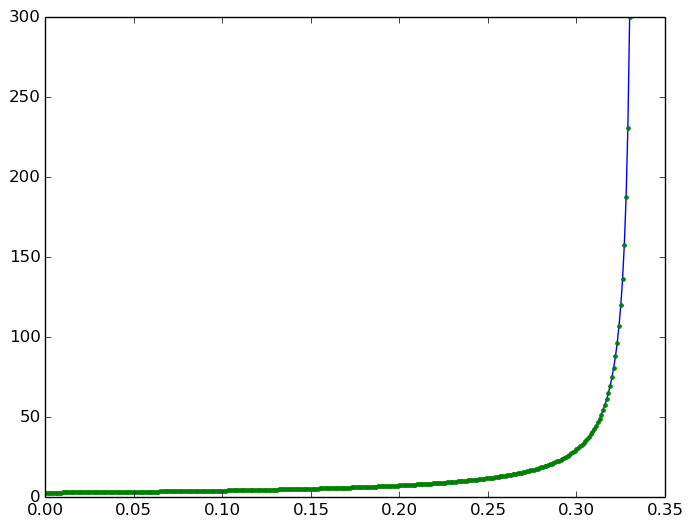

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fccfdaca910>

In [66]:
plot(t,x)
g = {3/(1-3*k) for k in t}
plot(t,g,".")

In [69]:
x[1:10]

10-element Array{Array{Float64,1},1}:
 [3.0]    
 [3.00903]
 [3.01811]
 [3.02725]
 [3.03644]
 [3.04569]
 [3.05499]
 [3.06435]
 [3.07377]
 [3.08325]

In [70]:
AD.Taylor(0,[3,9,0,0,0])

LoadError: AD not defined
while loading In[70], in expression starting on line 1

In [71]:
using AD

LoadError: AD not found
while loading In[71], in expression starting on line 1

In [72]:
include("Automata.jl")

LoadError: could not open file /home/juser/Automata.jl
while loading In[72], in expression starting on line 1